# Winter 2026 COMP 579 Assignment 1

Group: 67

Name: Rui Zhang, Chen Zhao

1. Do Not Change the Random Seed
The random seed has been set to ensure reproducibility. Please do not modify it.

2. Guidance for the First Question
For the initial question, fill in the blanks under the sections marked as TODO. Follow the provided structure and complete the missing parts.

3. Approach for Subsequent Questions
For the later questions, we expect you to attempt the solutions independently. You can refer to the examples provided in earlier questions to understand how to
plot figures and implement solutions.

4. Ensure that the plots you produce for later questions are similar in style and format to those shown in the previous examples.

5. Answer questions in the Answer block.

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(40)

plt.rcParams["figure.figsize"]=10,5

## Q1 Simulator for Bernoulli Bandit

In [ ]:

class BernoulliBandit:
  """
    A class representing a Bernoulli multi-armed bandit.

    Attributes
    ----------
    num_arms : int
        Number of arms in the bandit.
    probs : list or np.ndarray
        List of success probabilities for each arm (values between 0 and 1).

    Methods
    -------
    sample(arm_index)
        Samples a reward (0 or 1) from the specified arm based on a Bernoulli distribution.
    """

  # TODO:
  def __init__(self, num_arms, probs=None):
    self.num_arms = num_arms
    self.probs = probs

  def sample(self, arm_index):
    p = self.probs[arm_index]
    rand = np.random.rand()
    if (rand <= p):
        reward = 1
    else:
        reward = 0
    return reward



In [ ]:
# TODO:
delta = 0.2
num_arms = 3
probs = [0.5, 0.5 - delta, 0.5 + delta]
num_samples = 50

three_arm_bernoulli_bandit = BernoulliBandit(num_arms, probs)

# Store the rewards for each arm
action_rewards = []
actions = range(num_arms)

for action in actions:
    # Store 50 samples per action
    rewards = [three_arm_bernoulli_bandit.sample(action) for i in range(num_samples)]
    action_rewards.append(rewards)


### Graphs

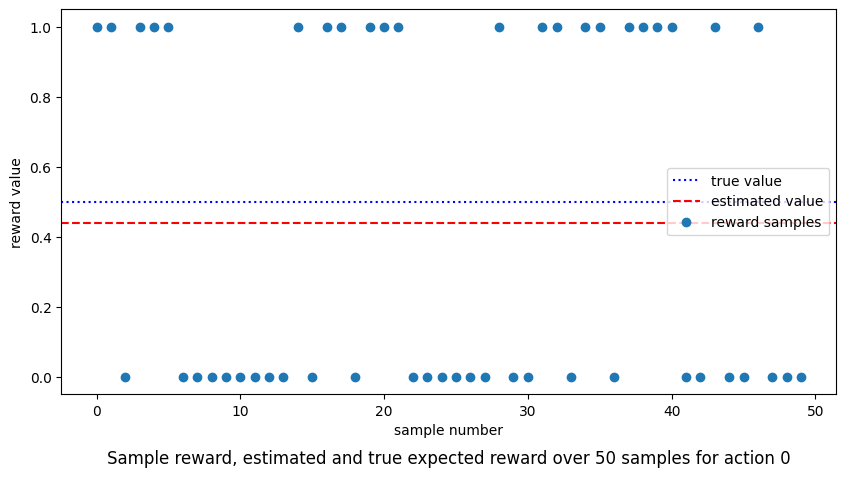

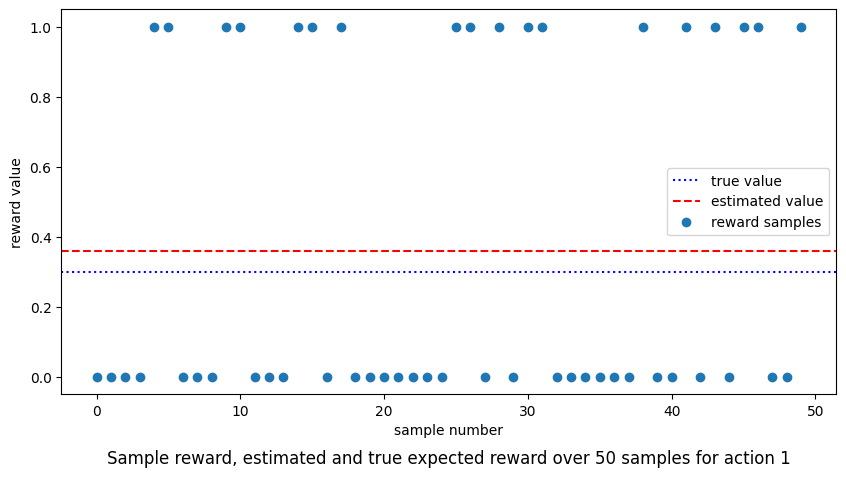

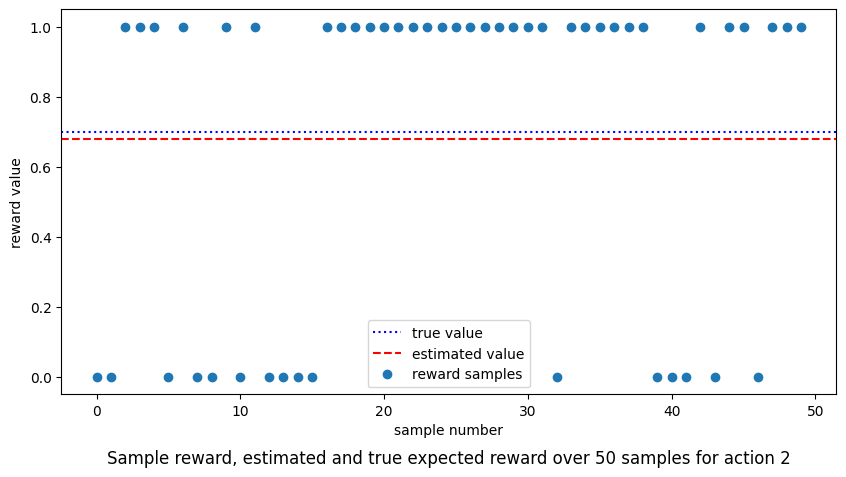

In [ ]:
for action in actions:
  fig, ax = plt.subplots()

  # TODO:
  true_value = probs[action]
  estimated_value = np.mean(action_rewards[action])

  # draw the line of the true value
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")
  # draw the line of the estimated value
  line_est_val = ax.axhline(y = estimated_value, color = 'r', linestyle = '--', label = "estimated value")
  # plot the reward samples
  plt_samples, = ax.plot(action_rewards[action], 'o', label = "reward samples")

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Sample reward, estimated and true expected reward over 50 samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, line_est_val, plt_samples])

## Q2 Estimated Q values

In [ ]:
def update(reward_samples, alpha):
    """Yields incremental average with fixed learning rate alpha."""
    Q = 0
    for i in range(len(reward_samples)):
        Q = Q + alpha * (reward_samples[i] - Q)
        yield Q



def updateAvg(reward_samples):
    """Yields incremental sample average."""
    Q = 0
    for n in range(1, len(reward_samples)+1):
        Q = Q + 1/n * (reward_samples[n-1] - Q)
        yield Q


### Graphs

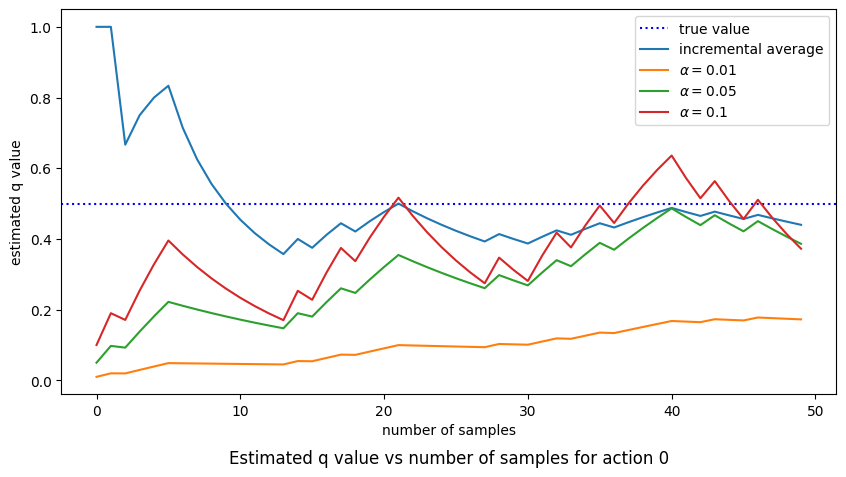

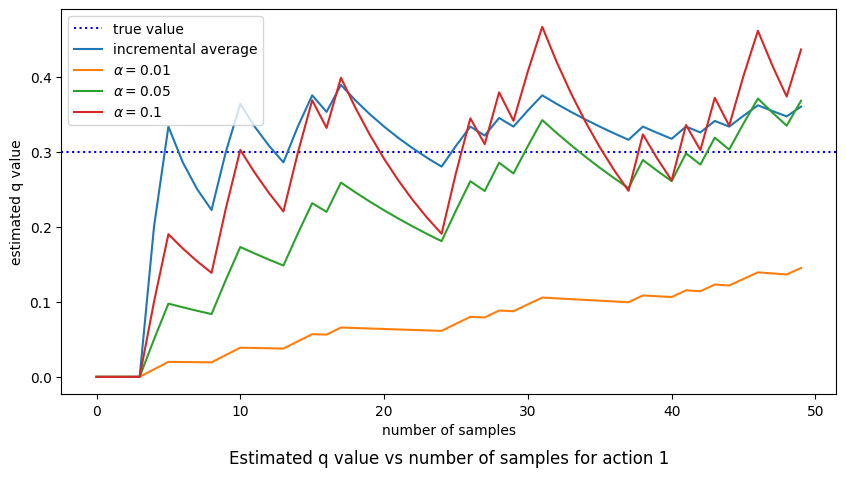

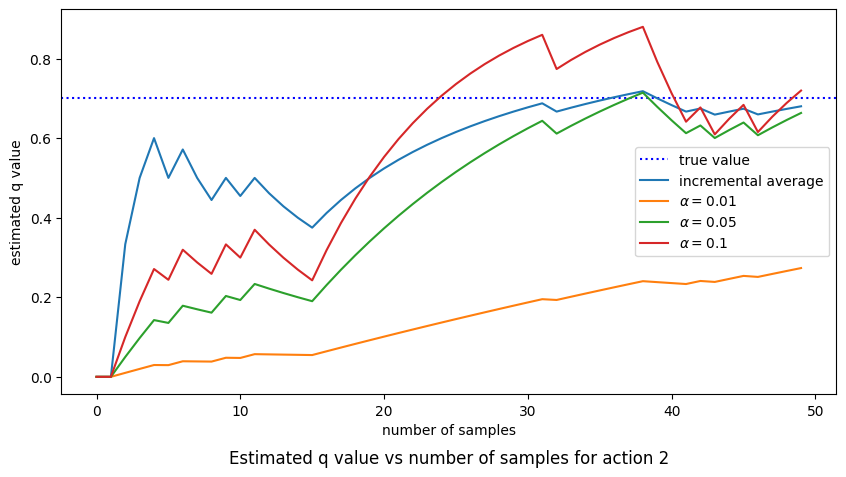

In [ ]:
for action in actions:
  fig, ax = plt.subplots()

  # TODO:
  incr_avgs = list(updateAvg(action_rewards[action]))
  alpha_1_percent = list(update(action_rewards[action], alpha=0.01))
  alpha_5_percent = list(update(action_rewards[action], alpha=0.05))
  alpha_10_percent = list(update(action_rewards[action], alpha=0.1))
  true_value = probs[action]

  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # plot incremental values for averaging, alpha = 0.01, alpha = 0.1
  plt_incr_avgs, = ax.plot(incr_avgs, label = "incremental average")
  plt_alpha_1_percent, = ax.plot(alpha_1_percent, label = r"$\alpha = 0.01$")
  plt_alpha_5_percent, = ax.plot(alpha_5_percent, label = r"$\alpha = 0.05$")
  plt_alpha_10_percent, = ax.plot(alpha_10_percent, label = r"$\alpha = 0.1$")

  ax.set_xlabel("number of samples")
  ax.set_ylabel("estimated q value")
  ax.set_title("Estimated q value vs number of samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_5_percent, plt_alpha_10_percent])

## Q3 Effect of $α$ on Estimated Q values

In [ ]:
# TODO:
num_samples = 100
num_runs = 100

incr_avgs_runs = []
alpha_1_percent_runs = []
alpha_5_percent_runs = []
alpha_10_percent_runs = []


# TODO:
for run in range(num_runs):
  sample_incr_avgs_by_actions = []
  sample_alpha_1_percent_by_actions = []
  sample_alpha_5_percent_by_actions = []
  sample_alpha_10_percent_by_actions = []

  for action in actions:
    rewards = []
    for i in range(num_samples):
        rewards.append(three_arm_bernoulli_bandit.sample(action))
    sample_incr_avgs_by_actions.append(list(updateAvg(rewards)))
    sample_alpha_1_percent_by_actions.append(list(update(rewards, alpha=0.01)))
    sample_alpha_5_percent_by_actions.append(list(update(rewards, alpha=0.05)))
    sample_alpha_10_percent_by_actions.append(list(update(rewards, alpha=0.1)))

  incr_avgs_runs.append(sample_incr_avgs_by_actions)
  alpha_1_percent_runs.append(sample_alpha_1_percent_by_actions)
  alpha_5_percent_runs.append(sample_alpha_5_percent_by_actions)
  alpha_10_percent_runs.append(sample_alpha_10_percent_by_actions)

# convert to np arrays
incr_avgs_runs = np.asarray(incr_avgs_runs)
alpha_1_percent_runs = np.asarray(alpha_1_percent_runs)
alpha_5_percent_runs = np.asarray(alpha_5_percent_runs)
alpha_10_percent_runs = np.asarray(alpha_10_percent_runs)

### Graphs

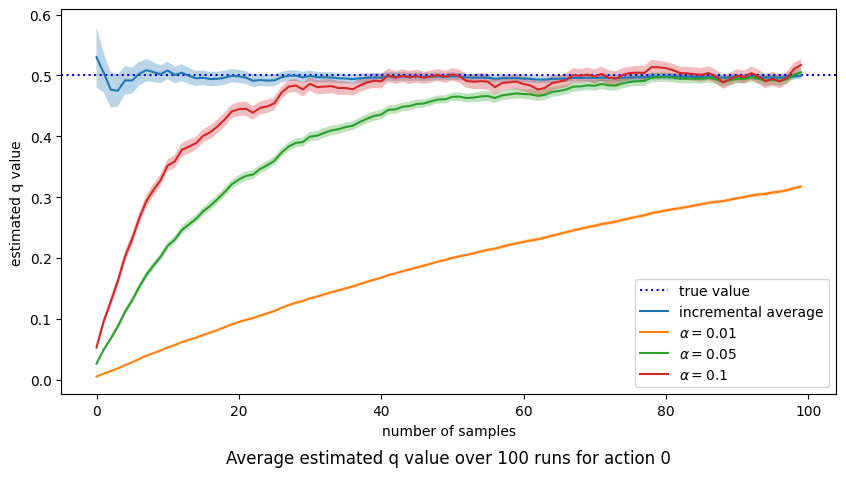

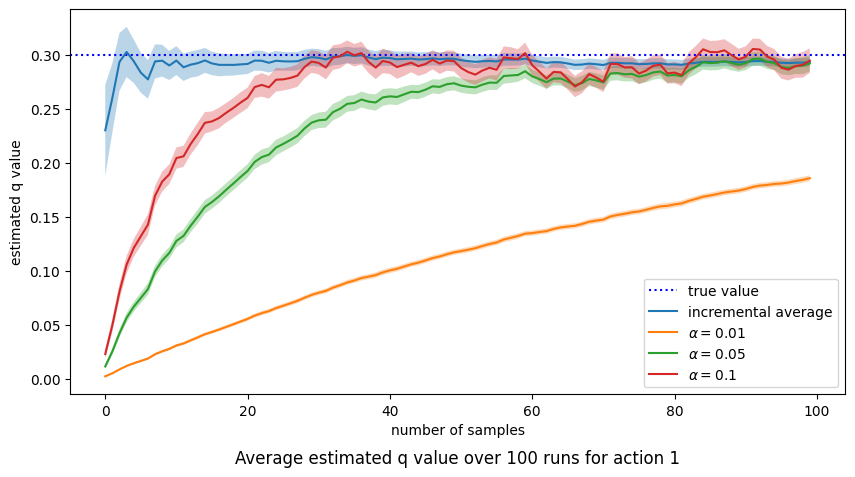

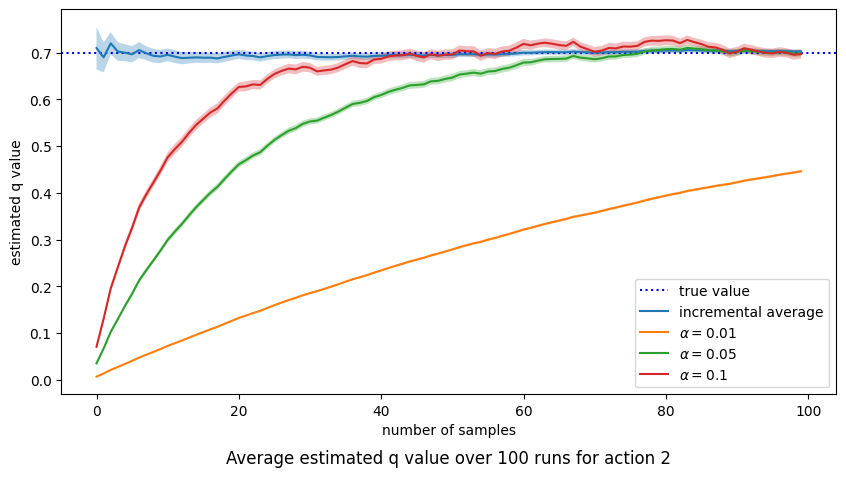

In [ ]:
from pdb import set_trace as bp
for action in actions:
  fig, ax = plt.subplots()

  # obtain averaged incremental reward values
  # TODO:

  # structure of incr_avgs_runs is [num_runs, num_actions. idx_in_sample]
  mean_incr_avgs_by_actions = np.mean(incr_avgs_runs[:,action,:], axis=0)
  mean_alpha_1_percent_by_actions = np.mean(alpha_1_percent_runs[:, action, :], axis=0)
  mean_alpha_5_percent_by_actions = np.mean(alpha_5_percent_runs[:, action, :], axis=0)
  mean_alpha_10_percent_by_actions = np.mean(alpha_10_percent_runs[:, action, :], axis=0)

  true_value = probs[action]

  std_err_incr_avgs_by_actions = np.std(incr_avgs_runs[:, action, :], axis=0) / np.sqrt(num_runs)
  std_err_alpha_1_percent_by_actions = np.std(alpha_1_percent_runs[:, action, :], axis=0) / np.sqrt(num_runs)
  std_err_alpha_5_percent_by_actions = np.std(alpha_5_percent_runs[:, action, :], axis=0) / np.sqrt(num_runs)
  std_err_alpha_10_percent_by_actions = np.std(alpha_10_percent_runs[:, action, :], axis=0) / np.sqrt(num_runs)


  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # draw the averaged incremental reward values for averaging
  plt_incr_avgs, = ax.plot(mean_incr_avgs_by_actions, label = "incremental average")
  # draw the error bar/area for averaging
  incr_avgs_minus_std_err = mean_incr_avgs_by_actions - std_err_incr_avgs_by_actions
  incr_avgs_plus_std_err = mean_incr_avgs_by_actions + std_err_incr_avgs_by_actions
  ax.fill_between(range(0,100), incr_avgs_minus_std_err, incr_avgs_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.01
  plt_alpha_1_percent, = ax.plot(mean_alpha_1_percent_by_actions, label = r"$\alpha = 0.01$")
  # draw the error bar/area for alpha = 0.01
  alpha_1_percent_minus_std_err = mean_alpha_1_percent_by_actions - std_err_alpha_1_percent_by_actions
  alpha_1_percent_plus_std_err = mean_alpha_1_percent_by_actions + std_err_alpha_1_percent_by_actions
  ax.fill_between(range(0,100), alpha_1_percent_minus_std_err, alpha_1_percent_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.05
  plt_alpha_5_percent, = ax.plot(mean_alpha_5_percent_by_actions, label = r"$\alpha = 0.05$")
  # draw the error bar/area for alpha = 0.05
  alpha_5_percent_minus_std_err = mean_alpha_5_percent_by_actions - std_err_alpha_5_percent_by_actions
  alpha_5_percent_plus_std_err = mean_alpha_5_percent_by_actions + std_err_alpha_5_percent_by_actions
  ax.fill_between(range(0,100), alpha_5_percent_minus_std_err, alpha_5_percent_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.1
  plt_alpha_10_percent, = ax.plot(mean_alpha_10_percent_by_actions, label = r"$\alpha = 0.1$")
  # draw the error bar/area for alpha = 0.1
  alpha_10_percent_minus_std_err = mean_alpha_10_percent_by_actions - std_err_alpha_10_percent_by_actions
  alpha_10_percent_plus_std_err = mean_alpha_10_percent_by_actions + std_err_alpha_10_percent_by_actions
  ax.fill_between(range(0,100), alpha_10_percent_minus_std_err, alpha_10_percent_plus_std_err, alpha=0.3)

  ax.set_xlabel("number of samples")
  ax.set_ylabel("estimated q value")
  ax.set_title("Average estimated q value over 100 runs for action %s" %action, y=-0.2)

  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_5_percent, plt_alpha_10_percent])

### Answers


Overall, the incremental averaging method shows the fastest convergence among all methods. It is relatively unstable in the first few steps because with very few samples, each new reward has a large influence on the running average. However, it becomes increasingly stable as more samples are collected.

Among those methods which update the action value within learning rate, the alpha = 0.01 learns very slowly and show underestimate at the end of the test. When alpha = 0.1 it perform better in convergence speed than alpha = 0.01,0.05 but is noiser which shows the bias-variance tradeoff, so in order to find a balance between speed and noise the range of alpha that going to explore should between [0.05,0.1].

## Q4 Epsilon-greedy

In [ ]:
def epsilon_greedy(bandit, epsilon, alpha = None, num_time_step = 1000, epsilon_decay=False, lambda_=0.001):
  """Epsilon greedy algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample
  epsilon: float
      A parameter which determines the probability for a random action to be selected
  alpha: (optional) float
      A parameter which determined the learning rate for averaging. If alpha is none, incremental averaging is used.
      Default is none, corresponding to incremental averaging.

  Returns
  -------
  R_over_t
      a list of instantaneous return over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  est_is_best_over_t
      a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
  l_over_t
      a list of instanteneous regret over the time steps
  total_l_over_t
      a list of cummulative regret over the time steps
  """
  # TODO:
  num_arms = bandit.num_arms

  Q_arr = np.zeros(num_arms)
  N_arr = np.zeros(num_arms)
  total_R = 0.0
  total_l = 0.0
  actions = np.arange(num_arms)

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []

  epsilon_t = epsilon

  for time_step in range(num_time_step):
    if epsilon_decay:
        epsilon_t = epsilon / (1 + lambda_*time_step)

    opt_value = np.max(bandit.probs)
    best_action = np.random.choice(np.flatnonzero(bandit.probs == opt_value))

    A_star = np.random.choice(np.flatnonzero(Q_arr == np.max(Q_arr)))
    A_random = np.random.randint(0, num_arms)
    A = A_random if np.random.rand() <= epsilon_t else A_star

    curr_R = bandit.sample(A)
    N_arr[A] = N_arr[A] + 1

    if alpha == None:
      # incremental averaging
      Q_arr[A] = Q_arr[A] + 1/N_arr[A] * (curr_R - Q_arr[A])
    else:
      Q_arr[A] = Q_arr[A] + alpha * (curr_R - Q_arr[A])

    R_over_t.append(curr_R)

    total_R = total_R + curr_R
    avg_R = total_R / np.sum(N_arr)
    total_R_over_t.append(avg_R)

    est_is_best = 1 if A == best_action else 0
    est_is_best_over_t.append(est_is_best)

    l_t = opt_value - bandit.probs[A]
    l_over_t.append(l_t)

    total_l = total_l + l_t
    total_l_over_t.append(total_l)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

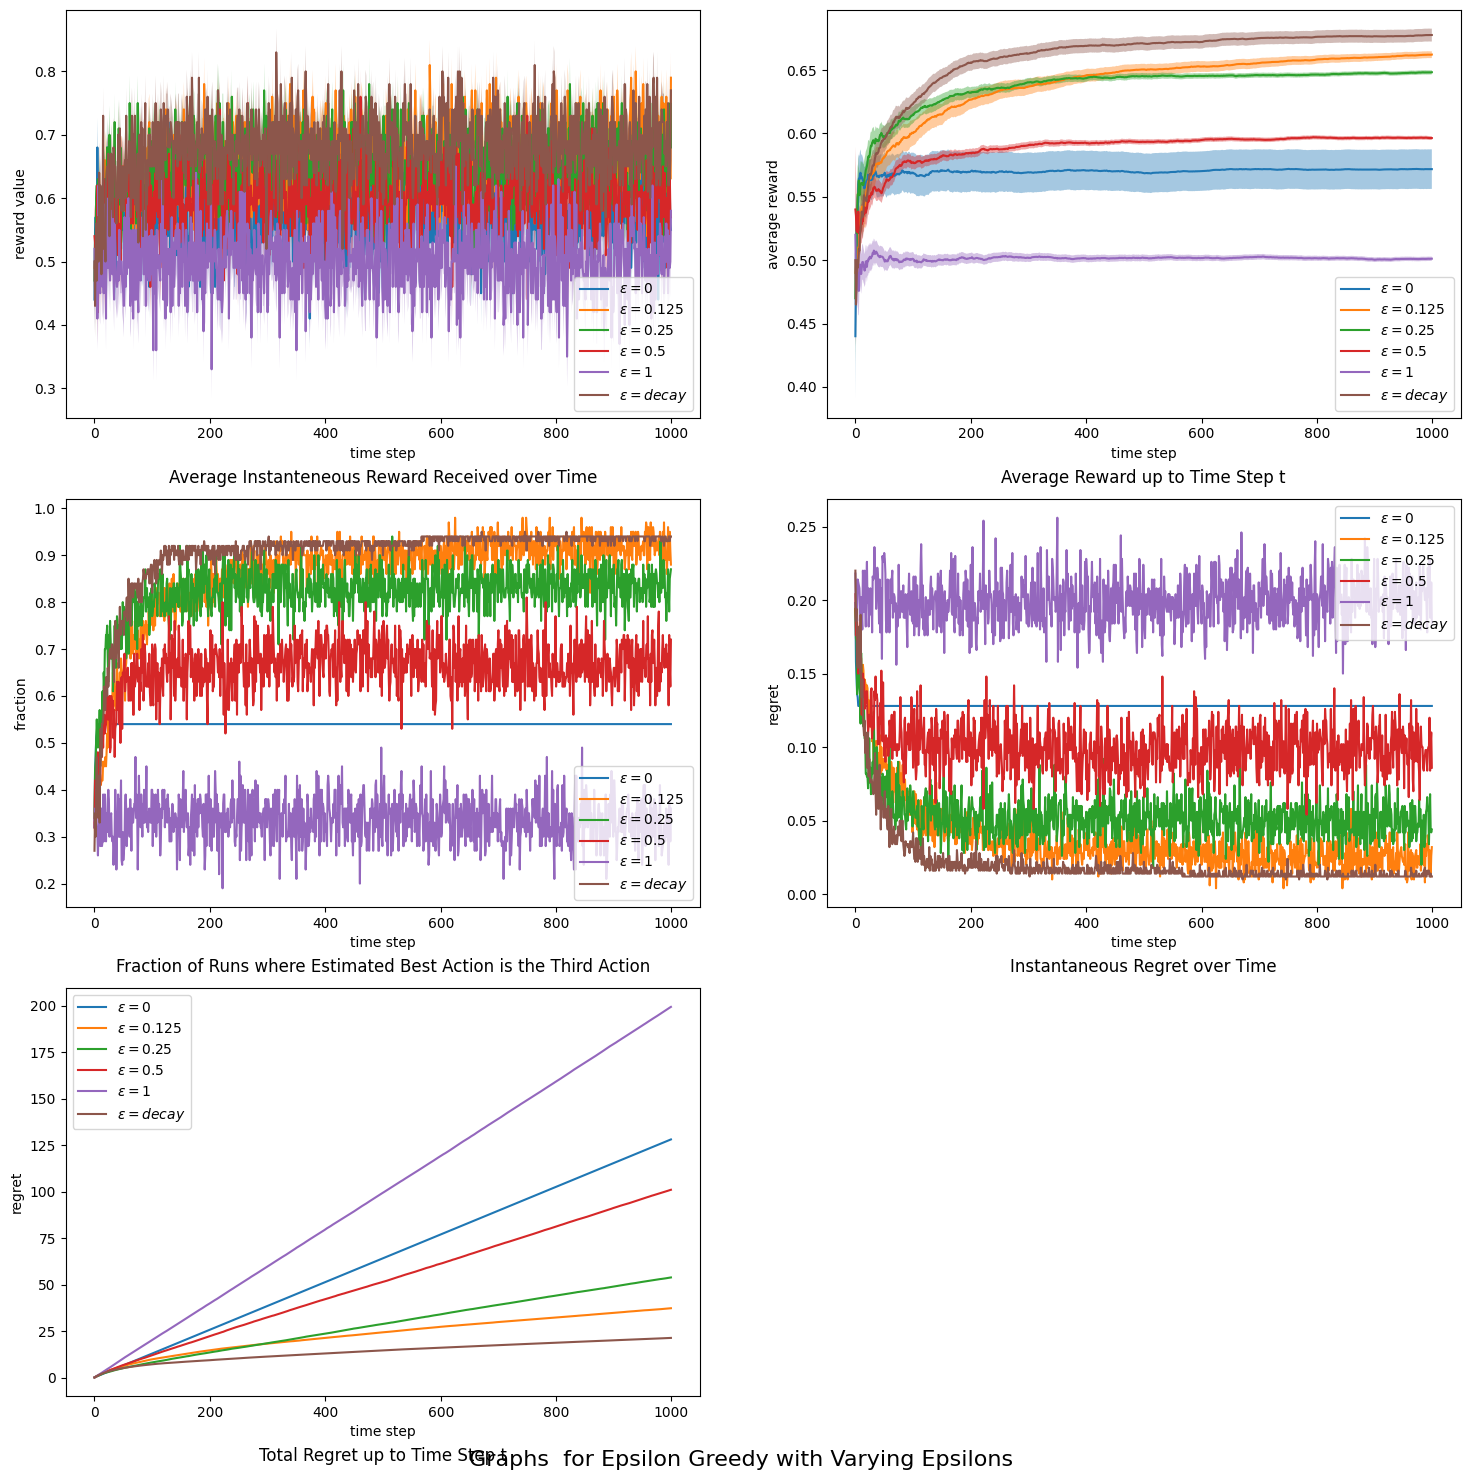

In [ ]:
#TODO:
epsilons = [0, 1/8, 1/4, 1/2, 1]
decaying_epsilon_params = {'epsilon_0': 1/2, 'lambda_': 0.1}  # Decaying epsilon parameters

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for epsilon in epsilons + ["decay"]:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    if epsilon == "decay":
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
          three_arm_bernoulli_bandit,
          decaying_epsilon_params['epsilon_0'],
          epsilon_decay=True,
          lambda_=decaying_epsilon_params['lambda_']
      )
    else:
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
          three_arm_bernoulli_bandit,
          epsilon
      )
    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("average reward")
  axs[0,1].set_title("Average Reward up to Time Step t", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("fraction")
  axs[1,0].set_title("Fraction of Runs where Estimated Best Action is the Third Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs  for Epsilon Greedy with Varying Epsilons'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers

When eps="decay" we have a eps-greedy algorithm wih decaying epsilon. The graphs show that this strategy perform best overall. It explores enough at the beginning to find out the optimal action, and then become increasingly exploitative as eps shrinks, make the reward curve more satble and make the total regret growth slower(has a near O(logt) trend), while or the other fixed eps methods show O(t) trend.

Among those methods without decaying eps=1 (random) keeps choose randomly, so both the regret and reward fluctuate around a constant level (avgerage value of the expexted reward of all arms & regret of all arms). When eps=0 (pure greedy) highly depend on first choice, so the avg instantenous reward and avg reward over t always lower than the cases when eps=0.125,0.25,0.5.

For fixed eps values (0.125, 0.25, 0.5), larger ε encourages more exploration early but also causes persistent exploration later, which prevents fully exploiting the optimal arm and leads to more variance and higher long-run regret. In these runs, eps = 0.125 achieves the best balance among constant step sizes: it may learn slightly slower than eps = 0.25 early on, but it is more stable later and chooses suboptimal actions less often, resulting in lower cumulative regret.


## Q5 Gradient Bandit

In [ ]:
def gradient_bandit(bandit, temperature, num_steps=1000, baseline=True):
  """Gradient bandit algorithm with softmax (Boltzmann) action selection."""
  #TODO:
  num_arms = bandit.num_arms

  Q = np.zeros(num_arms)
  N = np.zeros(num_arms)
  b = 0

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []
  total_R = 0
  total_l = 0

  alpha = 1

  for t in range(num_steps):
    optimal_arm = np.argmax(bandit.probs)
    optimal_reward = bandit.probs[optimal_arm]

    H = Q / temperature

    exp_H = np.exp(H)
    pi = exp_H / np.sum(exp_H)

    action = np.random.choice(num_arms, p=pi)

    reward = bandit.sample(action)

    if baseline:
      b = b + (reward - b) / (t + 1)

    adj = reward - b
    # update Ht(a) == update Qt(a)
    for a in range(num_arms):
      indicator = 1 if a == action else 0
      Q[a] = Q[a] + alpha * adj * temperature * (indicator - pi[a])

    N[action] = N[action] + 1

    # Track metrics
    R_over_t.append(reward)

    total_R = total_R + reward
    avg_R = total_R / (t+1)
    total_R_over_t.append(avg_R)

    est_is_best = int(action == optimal_arm)
    est_is_best_over_t.append(est_is_best)

    regret = optimal_reward - bandit.probs[action]  # use the true value but not the Qt(a)
    l_over_t.append(regret)

    total_l = total_l + regret
    total_l_over_t.append(total_l)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

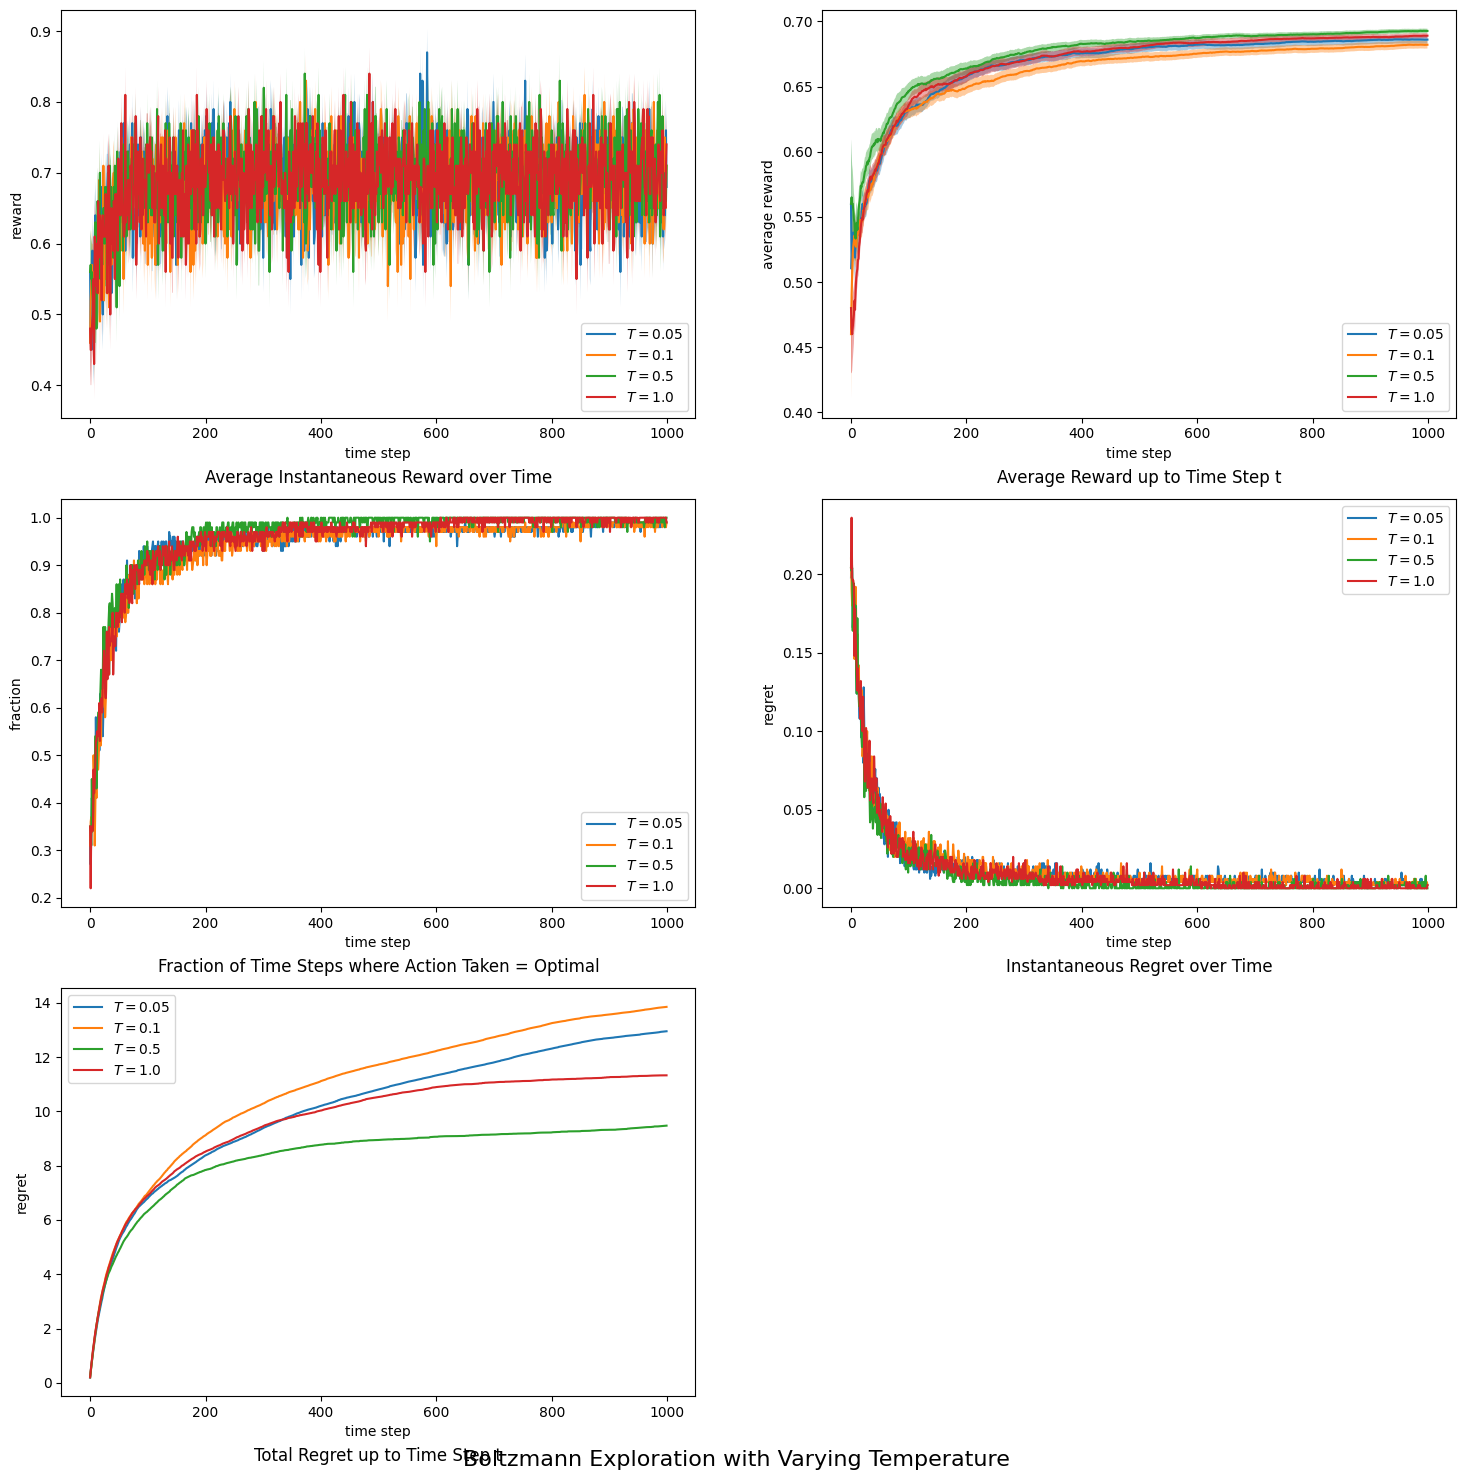

In [ ]:
#TODO:

temperatures = [0.05, 0.1, 0.5, 1.0]
num_steps = 1000

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for temperature in temperatures:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = gradient_bandit(
        three_arm_bernoulli_bandit, temperature, num_steps=num_steps, baseline=True)

    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # Plot 1: mean reward over time
  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(100)

  axs[0,0].plot(mean_R_over_t_runs, label=rf"$T = {temperature}$")
  axs[0,0].fill_between(range(num_steps), mean_R_over_t_runs - std_err_R_over_t_runs,
                        mean_R_over_t_runs + std_err_R_over_t_runs, alpha=0.4)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward")
  axs[0,0].set_title("Average Instantaneous Reward over Time", y=-0.18)

  # Plot 2: average reward up to time step t
  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R = np.std(total_R_over_t_runs, axis=0) / np.sqrt(100)

  axs[0,1].plot(mean_total_R_over_t_runs, label=rf"$T = {temperature}$")
  axs[0,1].fill_between(range(num_steps), mean_total_R_over_t_runs - std_err_total_R,
                        mean_total_R_over_t_runs + std_err_total_R, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("average reward")
  axs[0,1].set_title("Average Reward up to Time Step t", y=-0.18)

  # Plot 3: fraction optimal action
  est_is_best_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  axs[1,0].plot(est_is_best_avgs, label=rf"$T = {temperature}$")

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("fraction")
  axs[1,0].set_title("Fraction of Time Steps where Action Taken = Optimal", y=-0.18)

  # Plot 4: instantaneous regret
  l_over_t_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_avgs, label=rf"$T = {temperature}$")

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  # Plot 5: total regret
  total_l_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_avgs, label=rf"$T = {temperature}$")

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

fig.suptitle("Boltzmann Exploration with Varying Temperature", fontsize=16, y=0.08)
plt.show()

### Answers
From the graphs, the gradient bandit algorithm at all four temperatures eventually find out the optimal action at most of time, so the avg reward curve rise steadily and the instantaneous regret drops toward zero, while the fraction of optimal increase toward one.

Temperature indicates the degree of exploration. When T is higher the H(learning preference) will relatively lower, then the softmax would be less greedy (more uniform), and we can notice that the curve of avg instantaneous fructuate more than the others when T=1. When T=0.05,0.1 the softmax is more greedy, so they can achieve slightly higher reward earlier and their regret can fall a bit faster, but they also show a bit more sensitivity to early noise.

## Q6 Thompson Sampling

In [ ]:
def Thompson_sampling(bandit, alpha_prior=1, beta_prior=1, T=1000):
  """Thompson Sampling for Bernoulli bandit using Beta priors.  """
  #TODO:

  num_arms = bandit.num_arms

  # Initialize Beta distribution parameters for each arm
  alpha = [alpha_prior] * num_arms
  beta = [beta_prior] * num_arms

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []
  total_R = 0
  total_l = 0

  for t in range(T):
    optimal_arm = bandit.probs.index(max(bandit.probs))
    optimal_reward = max(bandit.probs)

    theta = np.random.beta(alpha, beta)

    max_theta = np.max(theta)
    action = np.argmax(theta)

    reward = bandit.sample(action)

    # Update Beta posterior
    if reward == 1:
        alpha[action] += 1
    else:
        beta[action] += 1

    # Track metrics
    R_over_t.append(reward)

    total_R = total_R + reward
    avg_R = total_R / (t+1)
    total_R_over_t.append(avg_R)

    est_is_best = int(action == optimal_arm)
    est_is_best_over_t.append(est_is_best)

    regret = optimal_reward - bandit.probs[action]
    l_over_t.append(regret)

    total_l = total_l + regret
    total_l_over_t.append(total_l)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

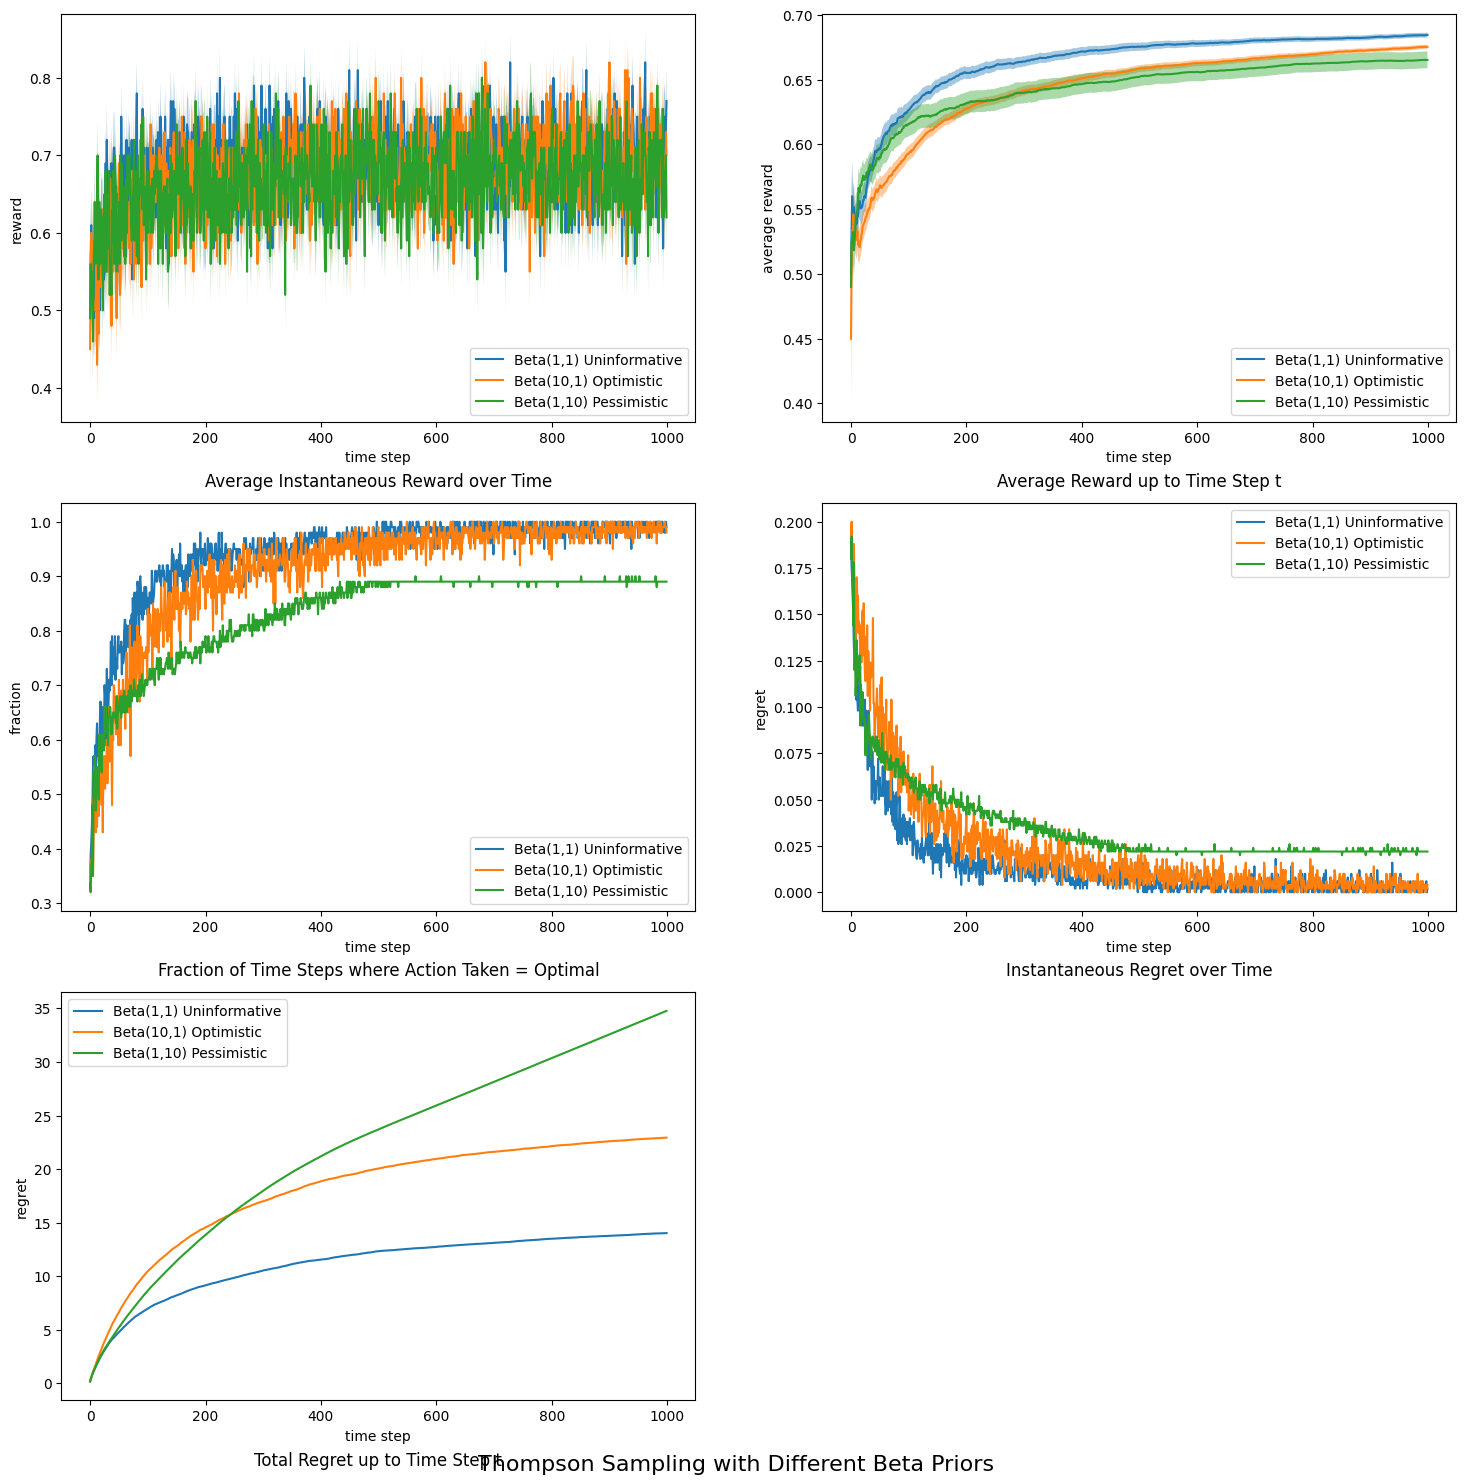

In [ ]:
#TODO:
priors = [(1,1), (10,1), (1,10)]
prior_names = [r"Beta(1,1) Uninformative", r"Beta(10,1) Optimistic", r"Beta(1,10) Pessimistic"]
T = 1000

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for prior, prior_name in zip(priors, prior_names):
  alpha_prior, beta_prior = prior

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = Thompson_sampling(
        three_arm_bernoulli_bandit, alpha_prior=alpha_prior, beta_prior=beta_prior, T=T)

    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # Plot 1: mean reward over time
  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(100)

  axs[0,0].plot(mean_R_over_t_runs, label=prior_name)
  axs[0,0].fill_between(range(T), mean_R_over_t_runs - std_err_R_over_t_runs,
                        mean_R_over_t_runs + std_err_R_over_t_runs, alpha=0.4)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward")
  axs[0,0].set_title("Average Instantaneous Reward over Time", y=-0.18)

  # Plot 2: average reward up to time step t
  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R = np.std(total_R_over_t_runs, axis=0) / np.sqrt(100)

  axs[0,1].plot(mean_total_R_over_t_runs, label=prior_name)
  axs[0,1].fill_between(range(T), mean_total_R_over_t_runs - std_err_total_R,
                        mean_total_R_over_t_runs + std_err_total_R, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("average reward")
  axs[0,1].set_title("Average Reward up to Time Step t", y=-0.18)

  # Plot 3: fraction optimal action
  est_is_best_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  axs[1,0].plot(est_is_best_avgs, label=prior_name)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("fraction")
  axs[1,0].set_title("Fraction of Time Steps where Action Taken = Optimal", y=-0.18)

  # Plot 4: instantaneous regret
  l_over_t_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_avgs, label=prior_name)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  # Plot 5: total regret
  total_l_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_avgs, label=prior_name)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

fig.suptitle("Thompson Sampling with Different Beta Priors", fontsize=16, y=0.08)
plt.show()

### Answers

When the prior is unimformative Beta(1,1), it start with high uncertatinty, so it would explore more at the beginning, once it has confident with one of the arm it would explore less and the fraction of optimal will grows fast and regret drop dramatically. For the Optimistic prior Beta(10,1) it is confident with all arms, so it would take some time to change it's beliefs, that cause it has higher early regret than Beta(1,1). Pessimistic prior Beta(1,10) starts with a low prior mean, so early posterior samples theta tend to be smaller and it generally needs more positive evidence (more observed successes) before strongly favoring any arm. As a result, it takes longer to concentrate probability on the optimal arm, leading to slower improvement in average reward and higher cumulative regret early on.

In the long term the priors has no significant effect, beacause as more data is collected the posterior has grater density at the true probability of arms. So gradually we could ignore the effect of the prior.


## Q7 Non-stationary Environment

In [ ]:
  #TODO:
class Non_stationary_Bandit:
    """Non-stationary Bernoulli bandit where arm probabilities swap every 500 steps."""

    def __init__(self, num_arms=3, probs=None, delta=0.2):
        self.num_arms = num_arms
        self.delta = delta
        self.probs = probs if probs is not None else [0.5, 0.5 - delta, 0.5 + delta]
        self.t = 0

    def sample(self, arm_index):
        # Sample reward using current probs
        p = self.probs[arm_index]
        rand = np.random.rand()
        if (rand <= p):
            reward = 1
        else:
            reward = 0
        self.t += 1

        if self.t == 500:
            self.t = 0
            self.probs[1], self.probs[2] = self.probs[2], self.probs[1]


        # Check if we need to swap for NEXT time step
        # Swap at t=500, 1000, 1500 (after 500, 1000, 1500 samples)

        return reward


### Graph


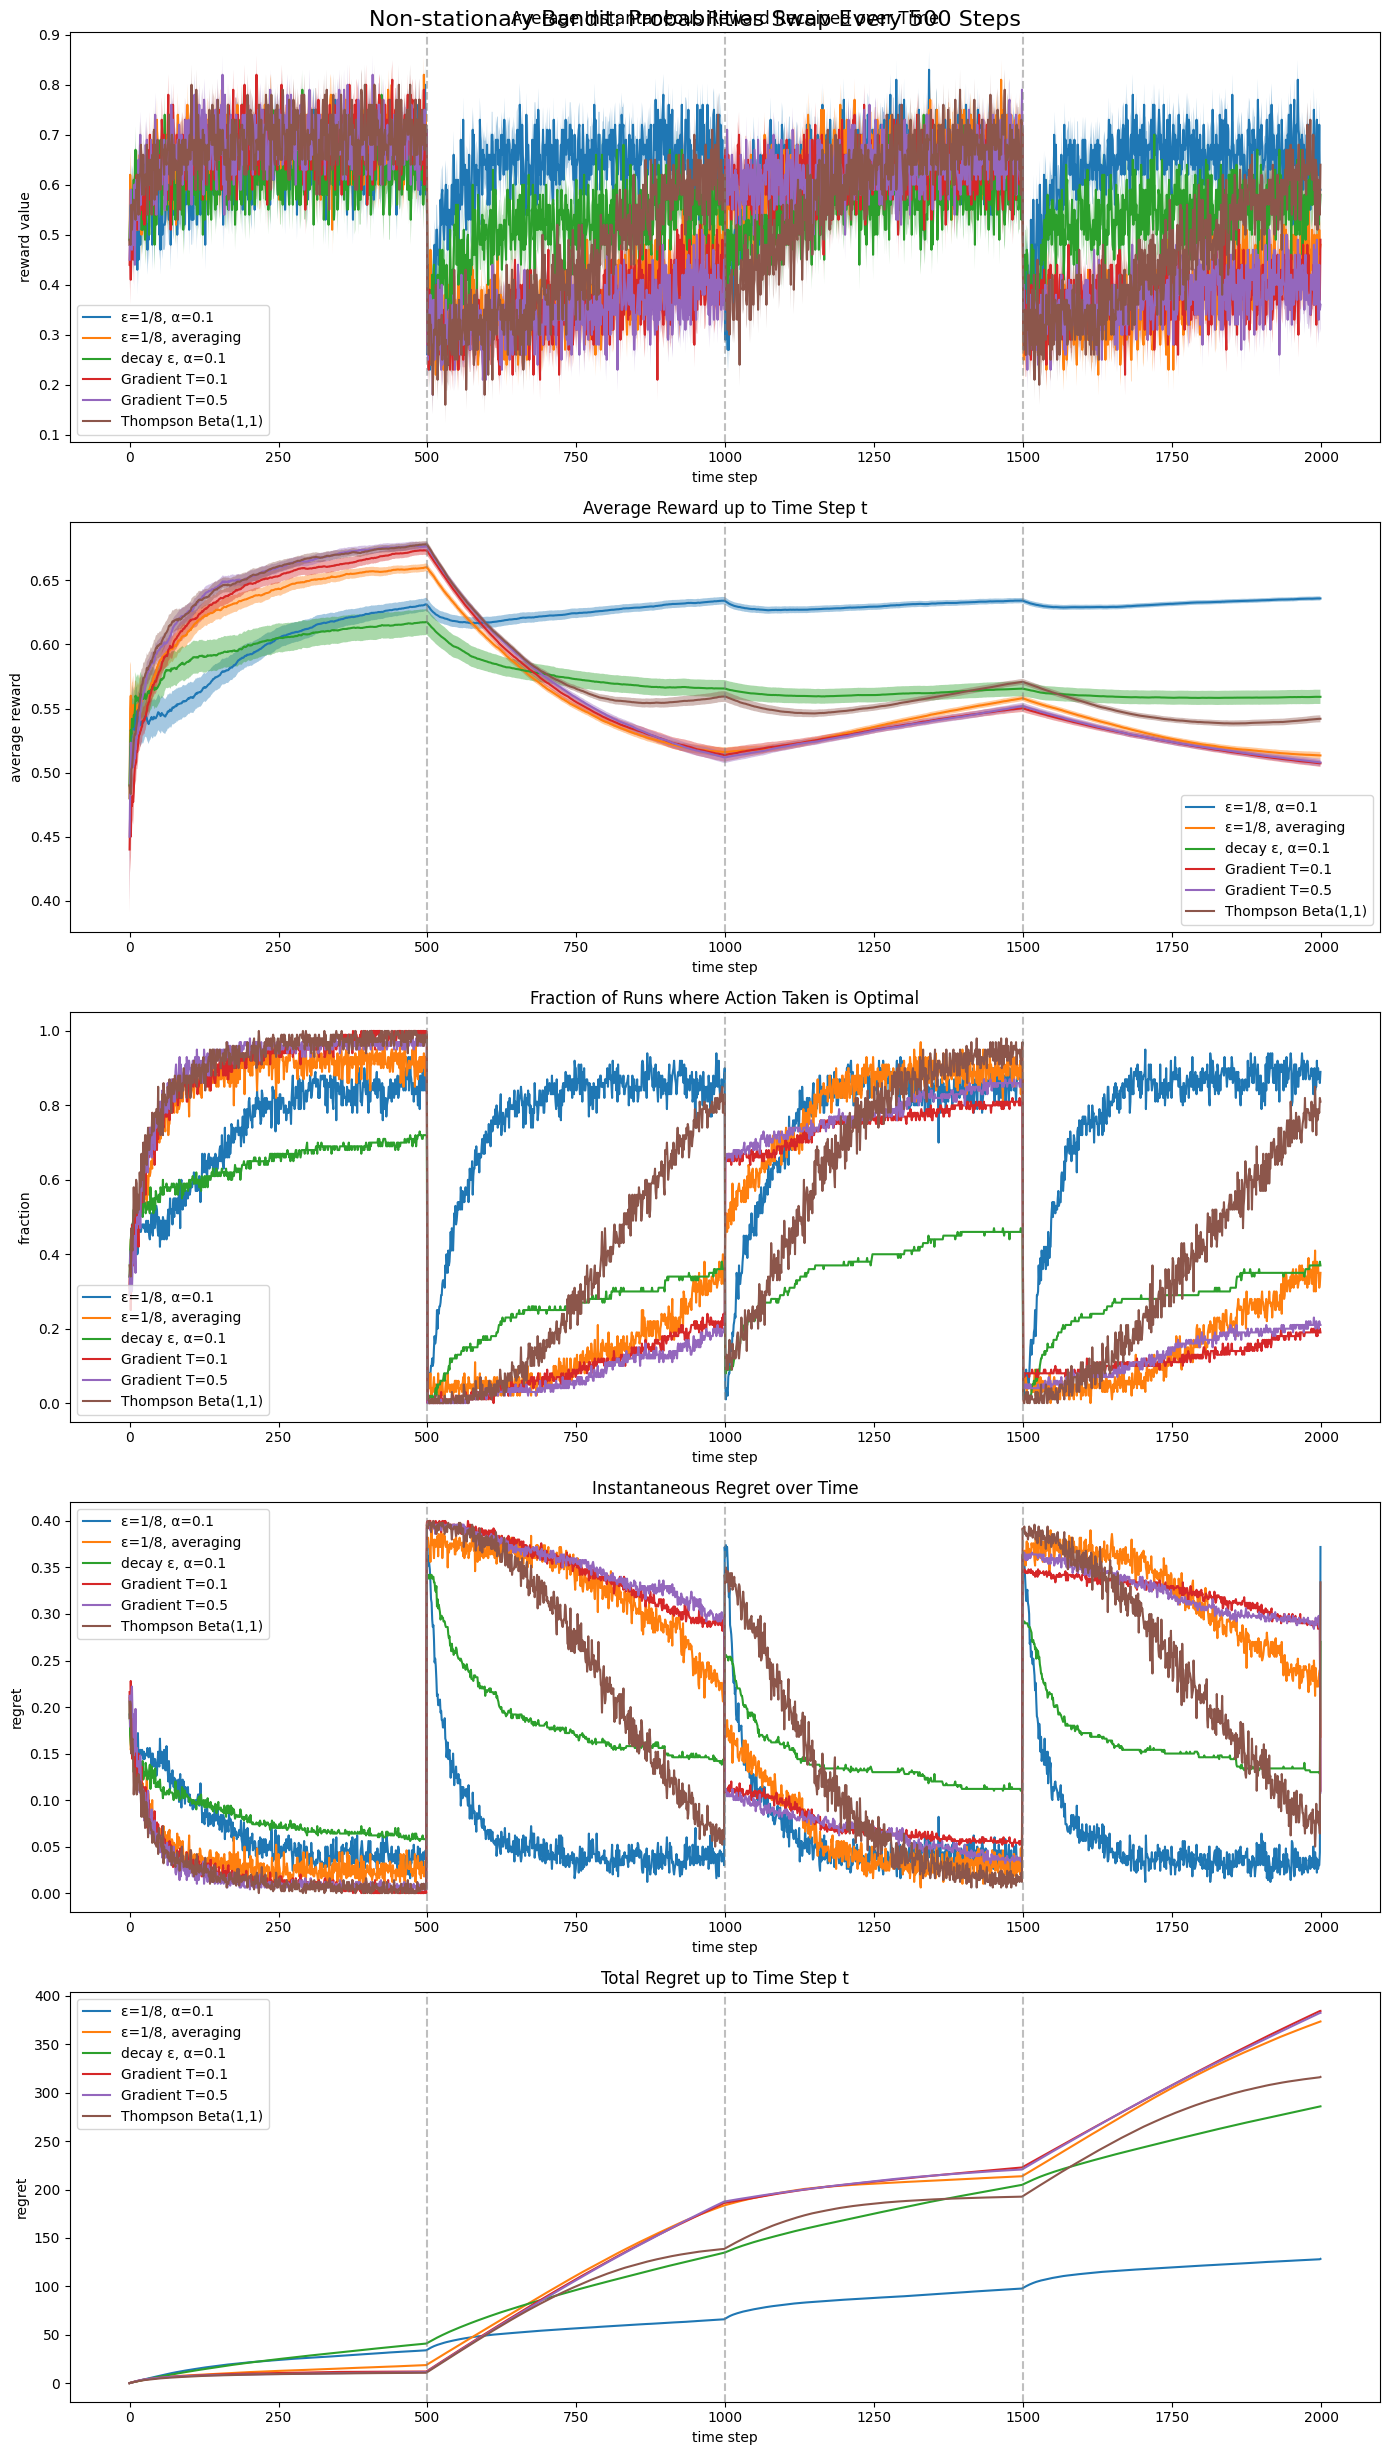

In [ ]:
# Configuration for Q9
#TODO:
delta = 0.2
T = 2000
num_runs = 100

algorithms = [
    ("ε=1/8, α=0.1", "epsilon_greedy", {"epsilon":1/8, "alpha":0.1}),
    ("ε=1/8, averaging", "epsilon_greedy", {"epsilon":1/8}),
    ("decay ε, α=0.1", "epsilon_greedy", {"epsilon":1/4,"alpha":0.1,"epsilon_decay":True, "lambda_":0.1}),
    ("Gradient T=0.1", "gradient_bandit", {"temperature":0.1}),
    ("Gradient T=0.5", "gradient_bandit", {"temperature":0.5}),
    ("Thompson Beta(1,1)", "thompson_sampling", {}),
]

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(14, 25))

for alg_name, alg_type, alg_params in algorithms:

    # arrays of the data generated from 100 runs
    R_over_t_runs = []
    total_R_over_t_runs = []
    est_is_best_over_t_runs = []
    l_over_t_runs = []
    total_l_over_t_runs = []

    for run in range(num_runs):
        # Create a fresh non-stationary bandit for each run
        bandit = Non_stationary_Bandit(num_arms=3, probs=[0.5, 0.5 - delta, 0.5 + delta], delta=delta)

        if alg_type == "epsilon_greedy":
            R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
                bandit,
                epsilon=alg_params["epsilon"],
                alpha=alg_params.get("alpha"),
                num_time_step=T,
                epsilon_decay=alg_params.get("epsilon_decay", False),
                lambda_=alg_params.get("lambda_", 0.001)
            )
        elif alg_type == "gradient_bandit":
            R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = gradient_bandit(
                bandit,
                temperature=alg_params["temperature"],
                num_steps=T,
                baseline=True
            )
        elif alg_type == "thompson_sampling":
            R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = Thompson_sampling(
                bandit,
                alpha_prior=1,
                beta_prior=1,
                T=T
            )

        R_over_t_runs.append(R_over_t)
        total_R_over_t_runs.append(total_R_over_t)
        est_is_best_over_t_runs.append(est_is_best_over_t)
        l_over_t_runs.append(l_over_t)
        total_l_over_t_runs.append(total_l_over_t)

    R_over_t_runs = np.asarray(R_over_t_runs)
    total_R_over_t_runs = np.asarray(total_R_over_t_runs)
    est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
    l_over_t_runs = np.asarray(l_over_t_runs)
    total_l_over_t_runs = np.asarray(total_l_over_t_runs)

    # plot the mean reward over time
    mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
    std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(num_runs)

    axs[0].plot(mean_R_over_t_runs, label=alg_name)
    axs[0].fill_between(range(T), mean_R_over_t_runs - std_err_R_over_t_runs,
                        mean_R_over_t_runs + std_err_R_over_t_runs, alpha=0.4)

    axs[0].legend()
    axs[0].set_xlabel("time step")
    axs[0].set_ylabel("reward value")
    axs[0].set_title("Average Instantaneous Reward Received over Time")

    # plot the mean average reward up to time step t
    mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
    std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(num_runs)

    axs[1].plot(mean_total_R_over_t_runs, label=alg_name)
    axs[1].fill_between(range(T), mean_total_R_over_t_runs - std_err_total_R_over_t_runs,
                        mean_total_R_over_t_runs + std_err_total_R_over_t_runs, alpha=0.4)

    axs[1].legend()
    axs[1].set_xlabel("time step")
    axs[1].set_ylabel("average reward")
    axs[1].set_title("Average Reward up to Time Step t")

    # plot the fraction of optimal action
    est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
    axs[2].plot(est_is_best_over_t_runs_avgs, label=alg_name)

    axs[2].legend()
    axs[2].set_xlabel("time step")
    axs[2].set_ylabel("fraction")
    axs[2].set_title("Fraction of Runs where Action Taken is Optimal")

    # plot the mean instantaneous regret over time
    l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
    axs[3].plot(l_over_t_runs_avgs, label=alg_name)

    axs[3].legend()
    axs[3].set_xlabel("time step")
    axs[3].set_ylabel("regret")
    axs[3].set_title("Instantaneous Regret over Time")

    # plot the total regret over time
    total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
    axs[4].plot(total_l_over_t_runs_avgs, label=alg_name)

    axs[4].legend()
    axs[4].set_xlabel("time step")
    axs[4].set_ylabel("regret")
    axs[4].set_title("Total Regret up to Time Step t")

# Add vertical lines at probability swap points
for ax in axs:
    for swap_t in [500, 1000, 1500]:
        ax.axvline(x=swap_t, color='gray', linestyle='--', alpha=0.5)

fig.suptitle('Non-stationary Bandit: Probabilities Swap Every 500 Steps', fontsize=16)
plt.tight_layout()
plt.show()

### Answer  

In this non-stationary bandit problem, the optimal action switches every 500 time steps as the reward probabilities of actions 2 and 3 are swapped. This causes a sudden drop in average reward and a spike in instantaneous regret for all algorithms at the change points (t = 500, 1000, 1500). The key difference between algorithms lies in how quickly they adapt after these changes.  
    
\
The ε-greedy algorithm with ε = 1/8 and α = 0.1 adapts the fastest to changes in the optimal action. After each swap, the average reward quickly recovers and the fraction of optimal actions rises rapidly. The constant step size allows the algorithm to forget outdated estimates, while the fixed ε ensures exploration, enabling efficient re-identification of the new optimal action. As a result, this method achieves the lowest cumulative regret.  


In contrast, ε-greedy with incremental averaging adapts much more slowly after changes. Because the effective step size decreases over time, and past observations dominate the estimates, making it difficult for the algorithm to adjust to new reward distributions. This leads to long periods of suboptimal behavior and higher cumulative regret.  


The decaying-ε strategy performs good early, but its performance deteriorates as ε becomes small. Reduced exploration in later stages prevents the algorithm from responding effectively when the optimal action changes, resulting in slower recovery of reward and higher regret.    

The gradient bandit methods (T = 0.1 and T = 0.5) show slower adaptation to non-stationarity. Preferences built from past rewards persist after the environment changes, causing delayed shifts toward the new optimal action. The different temperatures control the degree of exploration, but neither setting provides tracking ability in this changing environment. So it finally has a relatively high cumulative regret.


Thompson sampling with a Beta(1,1) prior shows moderate performance. While it is able to eventually adapt after each change, the posterior becomes increasingly confident over time, which reduces exploration and slows adaptation when the environment changes. So its ability to handle non-stationarity is limited.

\
Overall, the ε-greedy algorithm with a constant step size and fixed exploration rate is best suited to cope with non-stationarity, as it balances exploration with the ability to quickly discard outdated information and track changing optimal actions.

